##Module 5

# Import necessary libraries

In [9]:
import gzip
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# define some consts

img_size = 28*28   # minist image dimension
model_file_name = 'mnist/sample_weight.pkl'

# get test image and test label

In [36]:
key_file = {
    'test_img':     'mnist/t10k-images-idx3-ubyte.gz',
    'test_label':   'mnist/t10k-labels-idx1-ubyte.gz'
}

# load images

In [35]:
def load_images(file_name):
    with gzip.open(file_name, 'rb') as f:
        images = np.frombuffer(f.read(), np.uint8, offset=16)
    images = images.reshape(-1, img_size)

    print('Done with loading images:', file_name)

    return images

# load label

In [13]:
def load_labels(file_name):
    with gzip.open(file_name, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)

    print('Done with loading labels: ', file_name)
    return labels

In [14]:
key_file['test_img']

'mnist/t10k-images-idx3-ubyte.gz'

In [15]:
x_test = load_images(key_file['test_img'])

Done with loading images: mnist/t10k-images-idx3-ubyte.gz


In [16]:
x_test.shape

(10000, 784)

# reshape the image 28 x 28

In [56]:
test_img = x_test[0000].reshape(28, 28)

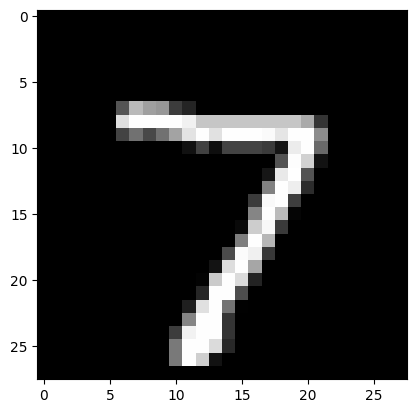

In [57]:
plt.imshow(test_img, cmap='gray')

In [19]:
test_img.shape

(28, 28)

In [20]:
y_test = load_labels(key_file['test_label'])

Done with loading labels:  mnist/t10k-labels-idx1-ubyte.gz


In [38]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
y_test.shape

(10000,)

In [37]:
y_test[5000]

3

## Network

In [39]:
import pickle

# define sigmoid function

In [40]:
def sigmoid(a):
    return 1/(1 + np.exp(-a))

# define softmax function

In [25]:
def softmax(a):
    c = np.max(a)
    a = np.exp(a - c)
    s = np.sum(a)
    
    return a/s 

# define network and import model 

In [26]:
def init_network(model_file_name):
    with open(model_file_name, 'rb') as f:
        network = pickle.load(f)

    return network

In [27]:
network = init_network(model_file_name)

In [28]:
w1 = network['W1']

# create a predict function

In [29]:
def predict(network, x):
    w1, w2, w3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, w1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, w2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, w3) + b3

    y =  softmax(a3)

    return y

In [30]:
input_5000 = x_test[5000]/255.0

In [41]:
input_5000

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
y = predict(network, input_5000)

# print y and sum of elemts in y array

In [32]:
print(y)
print(np.sum(y))

[2.28038138e-03 1.18191520e-04 7.62911472e-04 8.14812337e-01
 2.16972786e-04 1.77109839e-01 6.08290171e-05 2.41145964e-04
 3.66962773e-03 7.27763654e-04]
1.0


In [33]:
y_hat = np.argmax(y)
y_certainty = np.max(y)

# Print final result

In [34]:
if y_hat == y_test[5000]:
    print('success')
else:
    print('fail')
    
print(f'x[5000] is predicted as {y_hat} with {y_certainty*100}%. The label is {y_test[5000]}')

success
x[5000] is predicted as 3 with 81.48123374079384%. The label is 3


## Class Mnist

In [58]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pickle


class Mnist():
    def __init__(self):
        self.img_size = 28*28
        self.model_file_name = 'mnist/sample_weight.pkl'
        self.key_file = {
            'test_img':     'mnist/t10k-images-idx3-ubyte.gz',
            'test_label':   'mnist/t10k-labels-idx1-ubyte.gz'
        }
        self.network = self.init_network()

    #load images
    def load_images(self,file_name):
        with gzip.open(file_name, 'rb') as f:
            images = np.frombuffer(f.read(), np.uint8, offset=16)
        images = images.reshape(-1, self.img_size)

        print('Done with loading images:', file_name)

        return images

    #load labels
    def load_labels(self,file_name):
        with gzip.open(file_name, 'rb') as f:
            labels = np.frombuffer(f.read(), np.uint8, offset=8)

        print('Done with loading labels: ', file_name)
        return labels

    #define sigmoid function
    def sigmoid(self, a):
        return 1/(1 + np.exp(-a))

    #define softmax 
    def softmax(self,a):
        c = np.max(a)
        a = np.exp(a - c)
        s = np.sum(a)
        return a/s 
        
    #define predict function
    def predict(self, x):
        w1, w2, w3 = self.network['W1'], self.network['W2'], self.network['W3']
        b1, b2, b3 = self.network['b1'], self.network['b2'], self.network['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3

        y =  self.softmax(a3)

        return y
    
    def init_network(self):
        with open(self.model_file_name, 'rb') as f:
            network = pickle.load(f)
        return network


    def main(self):
        x_test = self.load_images(self.key_file['test_img'])
        test_img = x_test[0000].reshape(28, 28)
        y_test = self.load_labels(self.key_file['test_label'])
        input_5000 = x_test[0000] / 255.0

        y = self.predict(input_5000)
        y_hat = np.argmax(y)
        y_certainty = y[y_hat]

        print(y)
        print(np.sum(y))
        if y_hat == y_test[0000]:
            print('Success')
        else:
            print('Fail')
        
        print(f'x[5000] is predicted as {y_hat} with {y_certainty*100}%. The label is {y_test[0000]}')




Done with loading images: mnist/t10k-images-idx3-ubyte.gz
Done with loading labels:  mnist/t10k-labels-idx1-ubyte.gz
[8.44125033e-05 2.63506448e-06 7.15494238e-04 1.25862625e-03
 1.17279510e-06 4.49908218e-05 1.62693174e-08 9.97064966e-01
 9.37447336e-06 8.18311658e-04]
1.0000000000000002
Success
x[5000] is predicted as 7 with 99.7064965930607%. The label is 7
/How to use the class /*'
              Step 1: Import numpy, pickel and gzip and create an instance of the class
              Step 2: Initaialize te constructors and then load labels and images
              Step 3: Use sigmoid and softmax functions
              Step 4: Predict function used a neural network
              Step 5: Initialize nneural network with pickle
              Step 6: Main function for testing purpose
        
        


# Use Mnist function

In [ ]:
if __name__ == '__main__':
    mnist = Mnist()
    mnist.main()
    print("""/How to use the class /*'
              Step 1: Import numpy, pickel and gzip and create an instance of the class
              Step 2: Initaialize te constructors and then load labels and images
              Step 3: Use sigmoid and softmax functions
              Step 4: Predict function used a neural network
              Step 5: Initialize nneural network with pickle
              Step 6: Main function for testing purpose
        
        """)